<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) 

Project 3 is all about modelling exploring this data and modeling interesting relationships with regression. 


---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

** Feel free to include any other datasets from the San Francisco data if you think there is relevance or if it could be useful for your analysis.**


**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


In [234]:
import pandas as pd
import numpy as np

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Use the San Francisco assessor dataset and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.(This is totally upto you)
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [235]:
sf_a = pd.read_csv('/Users/adrija/Desktop/dsi-sf-7/datasets/sf_assessor_value/assessor_value_cleaned.csv')

In [236]:
sf_a.head()

,baths,beds,lot_depth,basement_area,front_ft,owner_pct,rooms,property_class,neighborhood,tax_rate,volume,sqft,stories,year_recorded,year_built,zone,value
0,2,2,0.0,0.0,0.0,1.00000,5,Z,08E,1000.0,1,1419,0,2007,1907,RH3,1002840.0
1,2,2,0.0,0.0,0.0,1.00000,7,Z,08E,1000.0,1,1773,0,2007,1907,RH3,1433430.0
2,2,2,0.0,0.0,0.0,1.00000,5,Z,08E,1000.0,1,1242,0,2007,1995,C2,485599.0
3,1,0,0.0,0.0,0.0,0.33333,6,D,08E,1000.0,1,1820,1,2007,1927,RH3,120826.0
4,1,0,0.0,0.0,0.0,1.00000,4,D,08E,1000.0,1,1020,1,2007,1926,RH3,988380.0


In [237]:
sf_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754147 entries, 0 to 754146
Data columns (total 17 columns):
baths             754147 non-null int64
beds              754147 non-null int64
lot_depth         754147 non-null float64
basement_area     754147 non-null float64
front_ft          754147 non-null float64
owner_pct         754147 non-null float64
rooms             754147 non-null int64
property_class    754147 non-null object
neighborhood      754147 non-null object
tax_rate          754147 non-null float64
volume            754147 non-null int64
sqft              754147 non-null int64
stories           754147 non-null int64
year_recorded     754147 non-null int64
year_built        754147 non-null int64
zone              754147 non-null object
value             754147 non-null float64
dtypes: float64(6), int64(8), object(3)
memory usage: 97.8+ MB


In [13]:
# I can see there from the info above there is no null values in the dataset (may be because I am using the 
#clean dataset)
# I would like to test the hypothesis that the value of a property is normally distributed

<bound method DataFrame.isnull of         baths  beds  lot_depth  basement_area  front_ft  owner_pct  rooms  \
0           2     2        0.0            0.0       0.0    1.00000      5   
1           2     2        0.0            0.0       0.0    1.00000      7   
2           2     2        0.0            0.0       0.0    1.00000      5   
3           1     0        0.0            0.0       0.0    0.33333      6   
4           1     0        0.0            0.0       0.0    1.00000      4   
5           1     0        0.0            0.0       0.0    1.00000      5   
6           3     3        0.0            0.0       0.0    1.00000      6   
7           3     3        0.0            0.0       0.0    0.81790      5   
8           2     2        0.0            0.0       0.0    1.00000      4   
9           2     0        0.0            0.0       0.0    0.50000      9   
10          2     2        0.0            0.0       0.0    0.50000      4   
11          1     1        0.0            

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [296]:
#1.
# To calculate linear regression I would choose my target variable to be value
# the features I would like to use here would be baths, beds, rooms and sqft
y = sf_a.value.values
All_Variables = sf_a[['value', 'baths', 'beds', 'rooms', 'sqft']]
Design = sf_a[['baths', 'beds', 'rooms', 'sqft']]
X = Design.values

pandas.core.frame.DataFrame

In [297]:
Design.describe()

,baths,beds,rooms,sqft
count,754147.000000,754147.000000,754147.000000,754147.000000
mean,1.454369,0.754092,5.582982,1399.682332
std,0.632256,1.241474,1.405920,461.872881
min,0.000000,0.000000,1.000000,495.000000
25%,1.000000,0.000000,5.000000,1075.000000
50%,1.000000,0.000000,5.000000,1320.000000
75%,2.000000,2.000000,6.000000,1656.000000
max,3.000000,4.000000,9.000000,3050.000000


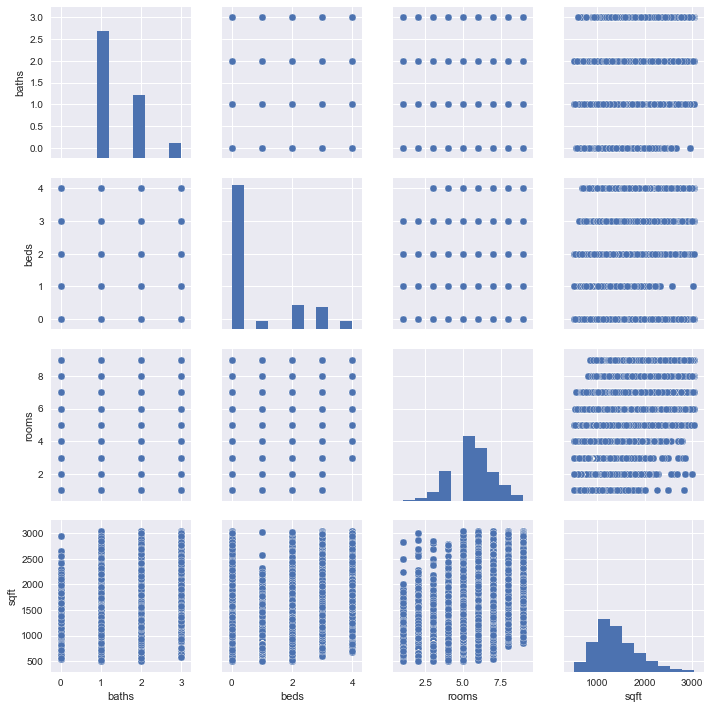

In [60]:
#2.
#To remove outliers or see if there is any I plotted the features below
import seaborn as sns
%matplotlib inline
sns.pairplot(Design)

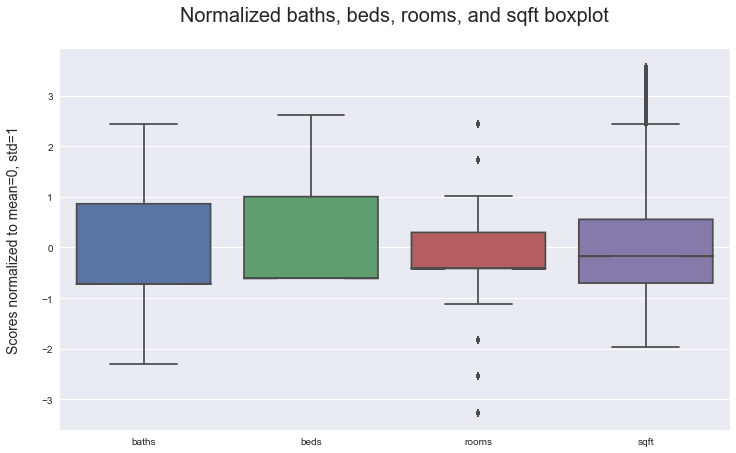

In [59]:
Design = sf_a[['baths', 'beds', 'rooms', 'sqft']]
Design_norm = (Design - Design.mean()) / Design.std()

fig = plt.figure(figsize=(12,7))
ax = fig.gca()

ax = sns.boxplot(data=Design_norm, ax=ax, notch=True)

ax.set_title('Normalized baths, beds, rooms, and sqft boxplot\n', fontsize=20)
ax.set_ylabel('Scores normalized to mean=0, std=1\n', fontsize=14)

plt.show()

In [61]:
#We need to transform the design variables



In [242]:
#3.
#linear regression model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

lm= linear_model.LinearRegression()

model = lm.fit(X, y)

# Predict your y, call them predictions, print the shape of predictions
# Print the shape of predictions
yhat = lm.predict(X)
yhat

print lm.score(X,y)

0.142968213045


In [243]:
#To create a K-fold cross-validation, we need to split the data into training and test sets
from sklearn.model_selection import KFold

def accuracy_crossvalidator(X, y, lm):
    scores = []
    kf = KFold(n_splits=5, random_state=None, shuffle=True)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        lm.fit(X_train, y_train)
            
        acc = lm.score(X_test, y_test)
        scores.append(acc)

    return scores, np.mean(scores)
    
accuracy_crossvalidator(X, y, lm)   

([0.14416819291479788,
  0.14219826410001302,
  0.14229832742297799,
  0.14265650356808024,
  0.14345677269009804],
 0.14295561213919344)

In [ ]:
# def accuracy_crossvalidator(X, y, knn):
#     '''Cross validates knn classifer with a StratifiedKFold
#     Input: X - design matrix, array
#            y - labels, array
#            knn - classifer, object
#     Output: accuracy scores, list
#             mean accuracy, float'''
        
#     scores = []
#     cv_indices = StratifiedKFold(n_splits=10)
#     for train_i, test_i in cv_indices.split(X,y):

#         X_train = X[train_i, :]
#         X_test = X[test_i, :]

#         y_train = y[train_i]
#         y_test = y[test_i]

#         knn.fit(X_train, y_train)

#         acc = knn.score(X_test, y_test)
#         scores.append(acc)


#     return scores, np.mean(scores)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

In [ ]:
#Rsquared values cannot be negative, it is bound to fall between 0 and 1
# Rsquared adjusted on the other hand can be negative, which means my model is a very poor fit to the data. 
# When Rsquared is exactly zero this means that ybar is just as good a predictor of y as yhat that is 
#the least squares regression line itself
# I looked into the internet, however where I found the explainiation that Rsquared can be negative
# when there is no intercept. The reason can be interpreted here as our ybar is doing a better job in explaining
#the data than yhat or the regression line

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine Crime and Fire incidents datasets from the  San Francisco data. Build a Linear regression model to predict number of fire incidents. What are the most significant predictors?

### Evaluate the model with regularized regression.

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**


- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. 
- Report on which model is best after performing regularization, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [16]:
#Getting the crime data first and analyzing it
sf_c =  pd.read_csv('/Users/adrija/Desktop/dsi-sf-7/datasets/san_francisco/san_francisco/sf_crime/sfpd_incidents_from2003.csv')

In [39]:
sf_c.head()
#Think I have picked up the cleaned dataset.

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110914565,WARRANTS,WARRANT ARREST,Friday,05/29/2015,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)",11091456563010
1,11351210,MISSING PERSON,FOUND PERSON,Tuesday,06/14/2016,08:55,BAYVIEW,NONE,1200 Block of 3RD ST,-122.389518,37.772468,"(37.7724682400061, -122.389517648036)",1135121075000
2,120789988,MISSING PERSON,FOUND PERSON,Monday,05/16/2016,00:41,INGLESIDE,NONE,WOOLSEY ST / UNIVERSITY ST,-122.412470,37.722659,"(37.7226585129212, -122.412469643631)",12078998875000
3,140608681,ROBBERY,"ROBBERY, BODILY FORCE",Thursday,06/16/2016,21:00,SOUTHERN,"ARREST, BOOKED",0 Block of UNITEDNATIONS PZ,-122.414318,37.779944,"(37.7799444052046, -122.414317857881)",14060868103074
4,140608681,OTHER OFFENSES,VIOLATION OF MUNICIPAL CODE,Thursday,06/16/2016,21:00,SOUTHERN,"ARREST, BOOKED",0 Block of UNITEDNATIONS PZ,-122.414318,37.779944,"(37.7799444052046, -122.414317857881)",14060868130200


In [40]:
sf_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945294 entries, 0 to 1945293
Data columns (total 13 columns):
IncidntNum    int64
Category      object
Descript      object
DayOfWeek     object
Date          object
Time          object
PdDistrict    object
Resolution    object
Address       object
X             float64
Y             float64
Location      object
PdId          int64
dtypes: float64(2), int64(2), object(9)
memory usage: 192.9+ MB


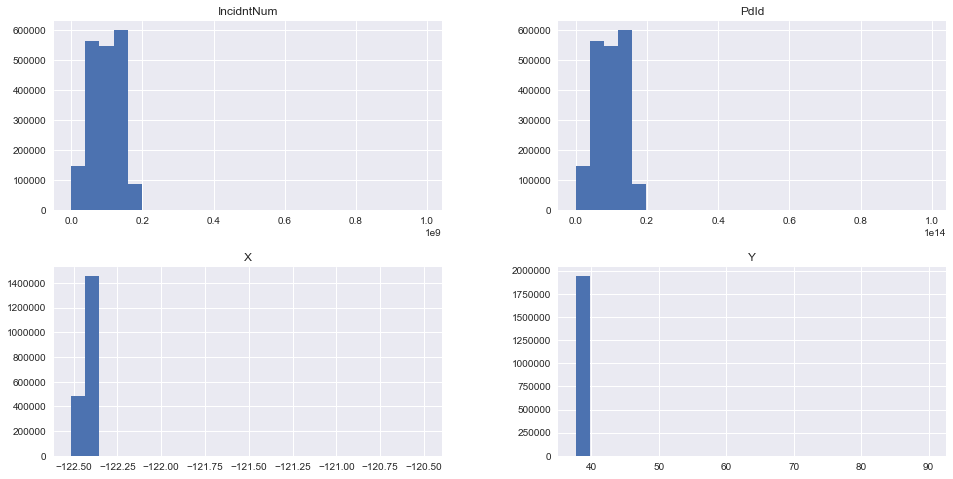

In [64]:
#The hypothesis I would like to test here would be the distribution of DayOfWeek is normal
#against the alternative hypothessis the distribution is not normal
# To perform a preliminary EDA I would like to plot a histogram and see the distribution
sf_c.hist(figsize=(16,8), bins=25);

In [37]:
sf_f1 = pd.read_csv('/Users/adrija/Desktop/dsi-sf-7/datasets/san_francisco/san_francisco/fire_data/fire_incidents.csv')

In [53]:
sf_f1.head()

,Incident Number,Exposure Number,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,Zipcode,...,Detector Effectiveness,Detector Failure Reason,Automatic Extinguishing System Present,Automatic Extinguishing Sytem Type,Automatic Extinguishing Sytem Perfomance,Automatic Extinguishing Sytem Failure Reason,Number of Sprinkler Heads Operating,Supervisor District,Neighborhood District,Location
0,9030109,0,310 Colon Av.,04/12/2009,91020273,04/12/2009 06:09:13 PM,04/12/2009 06:13:45 PM,04/12/2009 07:23:13 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13067402,0,20 Lansdale Av,07/18/2013,131990117,07/18/2013 10:32:03 AM,07/18/2013 10:37:15 AM,07/18/2013 10:39:55 AM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12044490,0,7th St. / Folsom St.,05/13/2012,121340051,05/13/2012 03:55:37 AM,05/13/2012 04:01:57 AM,05/13/2012 04:05:44 AM,SF,94103.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,South of Market,"(37.7767460000297, -122.407844)"
3,13033326,0,2799 Pacific Av,04/09/2013,130990286,04/09/2013 04:34:07 PM,04/09/2013 04:39:31 PM,04/09/2013 05:20:27 PM,SF,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11101416,0,Polk St. / Pine St.,11/01/2011,113050357,11/01/2011 06:07:45 PM,11/01/2011 06:10:17 PM,11/01/2011 06:11:09 PM,SF,94109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,Nob Hill,"(37.7896190000297, -122.420497)"


In [56]:
sf_f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406736 entries, 0 to 406735
Data columns (total 63 columns):
Incident Number                                 406736 non-null int64
Exposure Number                                 406736 non-null int64
Address                                         406633 non-null object
Incident Date                                   406736 non-null object
Call Number                                     406736 non-null int64
Alarm DtTm                                      406736 non-null object
Arrival DtTm                                    406718 non-null object
Close DtTm                                      406736 non-null object
City                                            405509 non-null object
Zipcode                                         334349 non-null float64
Battalion                                       406736 non-null object
Station Area                                    406207 non-null object
Box                                    

In [27]:
sf_f1_mask = sf_f1[np.isnan(sf_f1['Supervisor District'])]
sf_f1_mask
#sf_f1.dropna[[sf_f1_mask]]
# sf_f1 = sf_f1[sf_f1['Supervisor District'] is not np.nan]
# df.drop(df[<some boolean condition>].index)
sf_f1.drop(sf_f1_mask.index, inplace=True)
sf_f1_mask
sf_f1.shape

(334334, 63)

In [29]:
sf_f2 = pd.read_csv('/Users/adrija/Desktop/dsi-sf-7/datasets/san_francisco/san_francisco/fire_data/fire_inspections.csv')

/Users/adrija/anaconda/envs/dsi/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (14,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
sf_f2_mask = sf_f2[np.isnan(sf_f2['Supervisor District'])]
sf_f2.drop(sf_f2_mask.index, inplace=True)

In [32]:
sf_f2.head()
sf_f2.shape

(187778, 35)

In [52]:
sf_f3 = pd.read_csv('/Users/adrija/Desktop/dsi-sf-7/datasets/san_francisco/san_francisco/fire_data/sf_firecode_violations.csv')

In [55]:
sf_f3.head()

,Violation Id,Violation Number,Violation Date,Violation Item,Violation Item Description,Citation Number,Corrective Action,Inspection Number,Address,Zipcode,Battalion,Station Area,Fire Prevention District,Status,Close Date,Supervisor District,Neighborhood District,Location
0,1798813HAZ05,17988,07/21/2016,13HAZ05,hazard materials/store in approved manner,NaN,correct - no permit,291129.0,100 - 102 Pine St,94111.0,01,13,01S,open,07/27/2016,3.0,Financial District/South Beach,"(37.7926407300297, -122.39897033)"
1,1796013EXT04,17960,07/14/2016,13EXT04,extinguisher / service required,NaN,correct - no permit,290719.0,3180 - 3198 18th St,94110.0,02,07,02S,closed,07/25/2016,9.0,Mission,"(37.7623849400296, -122.41460054)"
2,1796013SPR08,17960,07/14/2016,13SPR08,sprinkler / 5-year service,NaN,correct - no permit,290719.0,3180 - 3198 18th St,94110.0,02,07,02S,closed,07/27/2016,9.0,Mission,"(37.7623849400296, -122.41460054)"
3,1799413PER01,17994,07/25/2016,13PER01,permit / general,NaN,correct - no permit,291201.0,101 02nd St,94105.0,03,01,03N,open,07/27/2016,6.0,Financial District/South Beach,"(37.7880797800297, -122.39914429)"
4,1799013EXT19,17990,07/22/2016,13EXT19,extinguisher / commercial cooking service requ...,NaN,correct - no permit,291139.0,414 - 430 Mason St,94102.0,01,01,01W,open,07/27/2016,3.0,Tenderloin,"(37.7875651800297, -122.40959283)"


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another analysis using the San Francisco Parks data to predict Park scores

---

1. Combining multiple sources of park data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.


In [67]:
#Before working on the San Francisco Parks data we need to load and see which datasets will be useful to us
#p1 denotes our first dataset
sf_p1 = pd.read_csv('/Users/adrija/Desktop/dsi-sf-7/datasets/san_francisco/san_francisco/parks/park_scores.csv')
sf_p1.head()

,ParkID,PSA,Park,FQ,Score
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957
2,9,PSA4,Rolph Nicol Playground,FY05Q3,0.864
3,117,PSA2,Alamo Square,FY05Q4,0.857
4,60,PSA6,Jose Coronado Playground,FY05Q4,0.859


In [120]:
sf_p1.Park.unique()

array(['Carl Larsen Park', 'Junipero Serra Playground',
       'Rolph Nicol Playground', 'Alamo Square',
       'Jose Coronado Playground', 'Little Hollywood Park',
       'Lake Merced Park', 'Golden Gate Park', 'Grattan Playground',
       'Francisco Park', 'Palace of Fine Arts', 'Corona Heights',
       'States Street Playground', 'Bernal Heights Recreation Center',
       'Turk-Hyde Mini Park', 'Upper Noe Recreation Center', 'Holly Park',
       'Betty Ann Ong Chinese Recreation Center',
       'Washington-Hyde Mini Park', 'Collis P. Huntington Park',
       'Ina Coolbrith Mini Park', 'Eureka Valley Recreation Center',
       'Seward Mini Park', 'Palega Recreation Center',
       'Golden Gate Heights Park', 'Noe Valley Courts',
       'George Christopher Playground', 'Douglass Playground',
       'Mission Playground', 'Angelo J. Rossi Playground',
       'Fulton Playground', 'Prentiss Mini Park', 'Cabrillo Playground',
       '10th Avenue-Clement Mini Park', 'Richmond Recreation Cen

In [70]:
sf_p1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5495 entries, 0 to 5494
Data columns (total 5 columns):
ParkID    5495 non-null int64
PSA       5495 non-null object
Park      5495 non-null object
FQ        5495 non-null object
Score     5494 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 214.7+ KB


In [68]:
#p2 denotes our second dataset
sf_p2 = pd.read_csv('/Users/adrija/Desktop/dsi-sf-7/datasets/san_francisco/san_francisco/parks/park_info.csv')
sf_p2.head()

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat
0,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,NaN,NaN,NaN,NaN,NaN,NaN
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN
2,15TH AVENUE STEPS,Mini Park,PSA 4,"Sheehy, Chuck",charles.sheehy@sfgov.org,(415) 218-2226,94122.0,0.26,7.0,185.0,"15th Ave b w Kirkham\nSan Francisco, CA\n(37.7...",NaN
3,24TH/YORK MINI PARK,Mini Park,PSA 6,"Field, Adrian",adrian.field@sfgov.org,(415) 717-2872,94110.0,0.12,9.0,51.0,"24th\nSan Francisco, CA\n(37.75306042, -122.40...",NaN
4,29TH/DIAMOND OPEN SPACE,Neighborhood Park or Playground,PSA 5,"O'Brien, Teresa",teresa.o'brien@sfgov.org,(415) 819-2699,94131.0,0.82,8.0,194.0,"Diamond\nSan Francisco, CA\n(37.74360211, -122...",NaN


In [121]:
sf_p2.ParkName.unique()

array(['10TH AVE/CLEMENT MINI PARK', '15TH AVENUE STEPS',
       '24TH/YORK MINI PARK', '29TH/DIAMOND OPEN SPACE',
       'ADAM ROGERS PARK', 'ALAMO SQUARE', 'ALICE CHALMERS PLAYGROUND',
       'ALICE MARBLE TENNIS COURTS', 'ALIOTO MINI PARK', 'ALLYNE PARK',
       'ALTA PLAZA', 'ANGELO J. ROSSI PLAYGROUND', 'APTOS PLAYGROUND',
       'ARGONNE PLAYGROUND', 'Arkansas Friendship Garden',
       'Arlington Community Garden', 'BALBOA NATURAL AREA', 'BALBOA PARK',
       'BAY VIEW PARK', 'BAY VIEW PLAYGROUND',
       "BEIDEMAN/O'FARRELL MINI PARK", 'BERKELEY WAY OPEN SPACE',
       'BERNAL HEIGHTS PARK', 'BERNAL HEIGHTS RECREATION CENTER',
       'BILLY GOAT HILL', 'BROADWAY TUNNEL EAST MINI PARK',
       'BROADWAY TUNNEL WEST MINI PARK', 'BROOKS PARK',
       'BROTHERHOOD/CHESTER MINI PARK', 'BUCHANAN STREET MALL',
       'BUENA VISTA PARK', 'BUSH/BRODERICK MINI PARK',
       'CABRILLO PLAYGROUND', 'CAMP MATHER', 'CANDLESTICK PARK',
       'CARL LARSEN PARK', 'CAYUGA PLAYGROUND',
       'C

In [123]:
sf_p2.rename(columns={'ParkName': 'Park'}, inplace=True)
sf_p2.head()

,Park,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN
2,15TH AVENUE STEPS,Mini Park,PSA 4,"Sheehy, Chuck",charles.sheehy@sfgov.org,(415) 218-2226,94122.0,0.26,7.0,185.0,"15th Ave b w Kirkham\nSan Francisco, CA\n(37.7...",NaN
3,24TH/YORK MINI PARK,Mini Park,PSA 6,"Field, Adrian",adrian.field@sfgov.org,(415) 717-2872,94110.0,0.12,9.0,51.0,"24th\nSan Francisco, CA\n(37.75306042, -122.40...",NaN
4,29TH/DIAMOND OPEN SPACE,Neighborhood Park or Playground,PSA 5,"O'Brien, Teresa",teresa.o'brien@sfgov.org,(415) 819-2699,94131.0,0.82,8.0,194.0,"Diamond\nSan Francisco, CA\n(37.74360211, -122...",NaN
5,ADAM ROGERS PARK,Neighborhood Park or Playground,PSA 3,"Watkins, Robert",robert.watkins@sfgov.org,(415) 819-6138,94124.0,2.74,10.0,46.0,"Ingalls\nSan Francisco, CA\n(37.73101645, -122...",NaN


In [136]:
#" ".join(a.split())
" ".join(sf_p2.ParkServiceArea.values.split())

AttributeError: 'numpy.ndarray' object has no attribute 'split'

In [71]:
sf_p2.info()
# Here latitute information is null (lat column) and Zipcode and location1 also has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 12 columns):
ParkName           230 non-null object
ParkType           230 non-null object
ParkServiceArea    230 non-null object
PSAManager         230 non-null object
email              230 non-null object
Number             230 non-null object
Zipcode            223 non-null float64
Acreage            229 non-null float64
SupDist            227 non-null float64
ParkID             229 non-null float64
Location 1         202 non-null object
Lat                0 non-null float64
dtypes: float64(5), object(7)
memory usage: 21.6+ KB


In [72]:
#Droping the parkids that are null 
sf_p2_mask = sf_p2[np.isnan(sf_p2.ParkID)]
sf_p2.drop(sf_p2_mask.index, inplace=True)

sf_p2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 1 to 229
Data columns (total 12 columns):
ParkName           229 non-null object
ParkType           229 non-null object
ParkServiceArea    229 non-null object
PSAManager         229 non-null object
email              229 non-null object
Number             229 non-null object
Zipcode            223 non-null float64
Acreage            229 non-null float64
SupDist            227 non-null float64
ParkID             229 non-null float64
Location 1         202 non-null object
Lat                0 non-null float64
dtypes: float64(5), object(7)
memory usage: 23.3+ KB


In [92]:
#p3 denotes our third dataset
sf_p3 = pd.read_csv('/Users/adrija/Desktop/dsi-sf-7/datasets/san_francisco/san_francisco/parks/park_donations.csv')
sf_p3.head()


,Close Date,Account Name,Description,Amount,Type
0,07/08/2014 12:00:00 AM,Glen Park Association,To support botanical signs at the Sunnyside Co...,$500.00,Cash
1,07/09/2014 12:00:00 AM,USTA NorCAL,To support HITS tennis programming and provide...,$2050.00,Cash
2,08/21/2014 12:00:00 AM,Walter S. Johnson Foundation,To support grounds maintenance at the Walter S...,$5000.00,Cash
3,09/04/2014 12:00:00 AM,Kaiser Permanente,To support the Golden Gate Park Senior Center ...,$1000.00,Cash
4,09/08/2014 12:00:00 AM,San Francisco Parks Alliance (SFPA),To support landscape improvements to Kezar Tri...,$1732.08,Cash


numpy.ndarray

In [95]:
sf_p3.Amount.values = float(sf_p3.Amount.values)


# plt.scatter(sf_p3['Close Date'], sf_p3['Amount']);
# plt.title("Relationship between Close Date and Amount");
# plt.xlabel("Close Date");
# plt.ylabel("Amount");

TypeError: only length-1 arrays can be converted to Python scalars

In [268]:
# to work with 3 datasets we can merge sf_p1 and sf_p2 on parkid but there is actually no common field between sf_p3
#or any of the other datasets
sf_p_merged = sf_p1.merge(sf_p2, on=['ParkID'], how='outer')
#sf_p_merged.shape #the merge looks wrong here but since I don't know how to fix it without appropriate ids I would like
#pretend its correct and keep working with that for the moment

In [269]:
sf_p_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5541 entries, 0 to 5540
Data columns (total 16 columns):
ParkID             5541 non-null float64
PSA                5495 non-null object
Park_x             5495 non-null object
FQ                 5495 non-null object
Score              5494 non-null float64
Park_y             5529 non-null object
ParkType           5529 non-null object
ParkServiceArea    5529 non-null object
PSAManager         5529 non-null object
email              5529 non-null object
Number             5529 non-null object
Zipcode            5322 non-null float64
Acreage            5529 non-null float64
SupDist            5527 non-null float64
Location 1         5004 non-null object
Lat                0 non-null float64
dtypes: float64(6), object(10)
memory usage: 735.9+ KB


In [83]:
#So our new table is sf_p_merged
sf_p_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5483 entries, 0 to 5482
Data columns (total 16 columns):
ParkID             5483 non-null object
PSA                5483 non-null object
Park               5483 non-null object
FQ                 5483 non-null object
Score              5482 non-null float64
ParkName           5483 non-null object
ParkType           5483 non-null object
ParkServiceArea    5483 non-null object
PSAManager         5483 non-null object
email              5483 non-null object
Number             5483 non-null object
Zipcode            5276 non-null float64
Acreage            5483 non-null float64
SupDist            5483 non-null float64
Location 1         4969 non-null object
Lat                0 non-null float64
dtypes: float64(5), object(11)
memory usage: 728.2+ KB


In [105]:
#To keep working with the data
#Before performing EDA we can get rid of lat and location column and delete the null values of 
# Zipcode
sf_p_merged_Data = sf_p_merged.loc[:,['Park', 'Score','Acreage', 'ParkType']]
sf_p_merged_Data

,Park,Score,Acreage,ParkType
0,Carl Larsen Park,0.795,6.58,Neighborhood Park or Playground
1,Carl Larsen Park,0.813,6.58,Neighborhood Park or Playground
2,Carl Larsen Park,0.256,6.58,Neighborhood Park or Playground
3,Carl Larsen Park,0.648,6.58,Neighborhood Park or Playground
4,Carl Larsen Park,0.716,6.58,Neighborhood Park or Playground
5,Carl Larsen Park,0.742,6.58,Neighborhood Park or Playground
6,Carl Larsen Park,0.849,6.58,Neighborhood Park or Playground
7,Carl Larsen Park,0.808,6.58,Neighborhood Park or Playground
8,Carl Larsen Park,0.779,6.58,Neighborhood Park or Playground
9,Carl Larsen Park,0.959,6.58,Neighborhood Park or Playground


In [116]:
#y = sf_p_merged_Data.Score

sf_p_merged_Data = pd.get_dummies(sf_p_merged_Data) 
sf_p_merged_Data.head()
#X = pd.get_dummies(sf_p_merged_Data['Acreage', 'ParkType'])


,Score,Acreage,Park_10th Avenue-Clement Mini Park,Park_24th Street-York Mini Park,Park_29th Street-Diamond Open Space,Park_Adam Rogers Park,Park_Alamo Square,Park_Alice Chalmers Playground,Park_Alice Marble Tennis Courts,Park_Alioto Mini Park,...,Park_West Sunset Playground,Park_Willie Woo Woo Wong Playground,Park_Woh Hei Yuen Park,Park_Yacht Harbor & Marina Green,Park_Youngblood Coleman Playground,ParkType_Civic Plaza or Square,ParkType_Mini Park,ParkType_Neighborhood Park or Playground,ParkType_Parkway,ParkType_Regional Park
0,0.795,6.58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.813,6.58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.256,6.58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.648,6.58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.716,6.58,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [119]:
y = sf_p_merged_Data.Score
X= sf_p_merged_Data['Acreage'].values

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Use a model from any of the previous questions above of your choice and construct a regularized regression model . Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


In [ ]:
#Working with the San Francisco assessor data I will try to model regularization

In [300]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.cross_validation import cross_val_score

ss = StandardScaler()

# use the "fit_transform" function to normalize the X design matrix
Xn = ss.fit_transform(X)

/Users/adrija/anaconda/envs/dsi/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [301]:
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(Xn, y)

print optimal_ridge.alpha_

6222.57083673


In [302]:
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, Xn, y, cv=10)

print ridge_scores
print np.mean(ridge_scores)

[ 0.11186276  0.11833264  0.1202527   0.14272212  0.06824849  0.15033573
  0.15486253  0.15819141  0.16487955  0.13694005]
0.132662797889


In [303]:
optimal_lasso = LassoCV(n_alphas=500, cv=10, verbose=1)
optimal_lasso.fit(Xn, y)

print optimal_lasso.alpha_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

105.875332874


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   16.5s finished


In [306]:
lasso = Lasso(alpha=105.875332874)

lasso_scores = cross_val_score(lasso, Xn, y, cv=10)

print lasso_scores
print np.mean(lasso_scores)

[ 0.11150023  0.11814975  0.12022605  0.14303846  0.06667852  0.15059184
  0.15545598  0.15859141  0.16582841  0.13607695]
0.132613759433


In [305]:
l1_ratios = np.linspace(0.01, 1.0, 50)

optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5,
                            verbose=1)
optimal_enet.fit(Xn, y)

print optimal_enet.alpha_
print optimal_enet.l1_ratio_

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

105.875332874
1.0


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  8.0min finished


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco Crime data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
 
- How would you measure the success of such a program?
  
- Rephrase this question to be unbiased:
    ** Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree? ** 
   


In [ ]:
#Ruling out delivery charges, assume they charge commission, as a percentage on the order.  

# The model may end up making the app spend more on the free order than the priced order 
                                                                                      
# To measure the success of the program, the price of the order of the new customer without free order, let's say 
# P_Order_F should be greater and the price of the free order of the existing customer let's call it P_Order 
#Assuming P_Order_F to be the cost the app making firm is incurring the profit would be
#Profit = Commission * P_Order - P_Order_F > 0


#Does there need to be stricter laws for dangerous weapons?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data from the following website: 
http://assets.datacamp.com/blog_assets/chol.txt'


- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?

In [251]:
chol = pd.read_csv('/Users/adrija/Desktop/dsi-sf-7/datasets/chol.csv')



In [252]:
chol.head()

,AGE HEIGHT WEIGHT CHOL SMOKE BLOOD MORT
0,20 176 77 195 nonsmo b alive
1,53 167 56 250 sigare o dead
2,44 170 80 304 sigare a dead
3,37 173 89 178 nonsmo o alive
4,26 170 71 206 sigare o alive


In [253]:
#chol_df = chol['AGE', 'HEIGHT', 'WEIGHT', 'CHOL', 'SMOKE', 'BLOOD', 'MORT'].apply(lambda x: pd.Series(x.split(' ')))
chol_df = chol['AGE HEIGHT WEIGHT CHOL SMOKE BLOOD MORT'].str[0:-1].str.split(' ', expand=True)
#chol = chol['AGE', 'HEIGHT', 'WEIGHT', 'CHOL', 'SMOKE', 'BLOOD', 'MORT'].str[1:-1].str.split(' ', expand=True)
chol_df.head()


,0,1,2,3,4,5,6
0,20,176,77,195,nonsmo,b,aliv
1,53,167,56,250,sigare,o,dea
2,44,170,80,304,sigare,a,dea
3,37,173,89,178,nonsmo,o,aliv
4,26,170,71,206,sigare,o,aliv


In [254]:
chol_df.columns

RangeIndex(start=0, stop=7, step=1)

In [260]:
#chol_df.rename(index=str, columns={"0": "AGE", "1": "HEIGHT"})
# chol_df_1 = chol_df.rename(columns={'0': 'AGE'}, inplace=True)
# chol_df_1.head()
chol_df.rename(columns={0: 'AGE', 1 : 'HEIGHT',
2 : 'WEIGHT', 3: 'CHOL', 4: 'SMOKE', 5:'BLOOD', 6:'MORT'}, inplace=True)
chol_df.head()

,AGE,HEIGHT,WEIGHT,CHOL,SMOKE,BLOOD,MORT
0,20,176,77,195,nonsmo,b,aliv
1,53,167,56,250,sigare,o,dea
2,44,170,80,304,sigare,a,dea
3,37,173,89,178,nonsmo,o,aliv
4,26,170,71,206,sigare,o,aliv


In [255]:
#Summary Statistics
chol_df.describe().T

,count,unique,top,freq
0,200,39,37,20
1,200,32,170,23
2,200,46,74,11
3,200,112,195,7
4,200,3,sigare,109
5,200,4,o,91
6,200,2,aliv,176


In [256]:
chol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
0    200 non-null object
1    200 non-null object
2    200 non-null object
3    200 non-null object
4    200 non-null object
5    200 non-null object
6    200 non-null object
dtypes: object(7)
memory usage: 11.0+ KB


In [261]:
# In order to proceed we have to convert the strings into float
chol_df.AGE = chol_df.AGE.apply(lambda x: float(x))
chol_df.HEIGHT = chol_df.HEIGHT.apply(lambda x: float(x))
chol_df.WEIGHT = chol_df.WEIGHT.apply(lambda x: float(x))
chol_df.CHOL = chol_df.CHOL.apply(lambda x: float(x))


In [262]:
chol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
AGE       200 non-null float64
HEIGHT    200 non-null float64
WEIGHT    200 non-null float64
CHOL      200 non-null float64
SMOKE     200 non-null object
BLOOD     200 non-null object
MORT      200 non-null object
dtypes: float64(4), object(3)
memory usage: 11.0+ KB


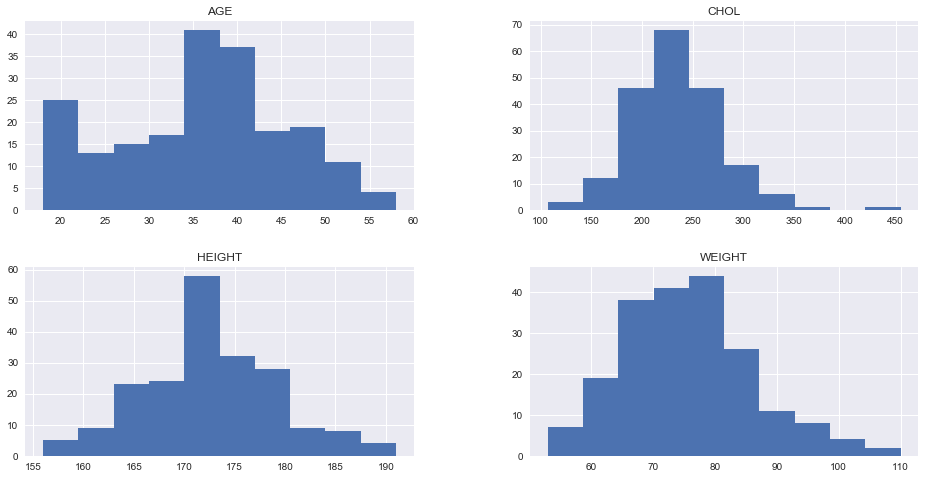

In [263]:
import matplotlib.pyplot as plt
chol_df.hist(figsize=(16,8), bins=10);


In [267]:
# we need to convert the mortalities into binary variable and arrange the smoke column
chol_df.MORT = chol_df.MORT.apply(lambda x: 1 if x == 'aliv' else 0)
chol_df.SMOKE = chol_df.SMOKE.apply(lambda x: 'Nonsmoker' if x == 'nonsmo' else 'Smoker')
chol_df.head()


# there is certainly a difference in mortality rates between smokers, nonsmokers
chol_df.groupby(["SMOKE"])['MORT'].count()
# seems from the count of mortality that smokers have a better chance to live more than the non smokers

SMOKE
Nonsmoker     49
Smoker       151
Name: MORT, dtype: int64

In [271]:
# Given national average weight = 85 pounds
# our null hypothesis is weightbar = 85 pounds
# our alternative hypothesis is weightbar != 85 pounds
weight_mean = np.mean(chol_df.WEIGHT)
weight_std = np.std(chol_df.WEIGHT)
print weight_mean, weight_std

75.885 10.4159385079


In [279]:
n = len(chol_df.WEIGHT)

In [284]:
t_stat = (weight_mean - 85)/(weight_std/np.sqrt(n))
print t_stat


-12.3757994647


In [287]:
import scipy.stats as stats
import scipy

pvalue = stats.t.sf(np.abs(t_stat), n-1)*2
pvalue

1.8416159910431377e-26

In [290]:
#Let's say 
alpha = .05
# Since pvalue < alpha, we reject our null hypothesis at 5 % level of significance or the average weight of the chol
#sample is significantly different than 85 pounds.

In [ ]:
#For a one sided test our null hypothesis H0 will be that chol average weight mean is equal to 85 pounds
#against alternative hypothesis H1 that chol average weight mean < 85 pounds

In [293]:
#we will approach this by calculating confidence interval from our two sided test
#Less-than: p/2 < confidence level and t < 0
lower = tdist.ppf(alpha/2)
print weight_mean + (lower*(weight_std/np.sqrt(n)))

74.4326183618


In [295]:
pval = pvalue/2
pval

9.2080799552156883e-27

In [ ]:
#Since here tstat < 0
#and pval < lower confidence interval, therefore, we reject the null hypothesis at 5% level of significance
